In [241]:
#pip install vaderSentiment
import pandas as pd

In [242]:
data=pd.read_csv(r'C:\Users\Suneetha\python files\PROJECT-2\hotel_reviews.csv',encoding="Latin1")
data

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


In [243]:
data.head(5)

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [244]:
len(data)

20491

In [245]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [246]:
data.columns

Index(['Review', 'Rating'], dtype='object')

In [247]:
data[data.duplicated()]

,Review,Rating


<AxesSubplot:ylabel='Rating'>

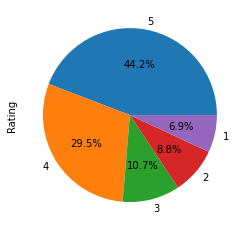

In [248]:
data['Rating'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [249]:
import matplotlib.pyplot as plt
import seaborn as sns


<AxesSubplot:xlabel='Rating', ylabel='count'>

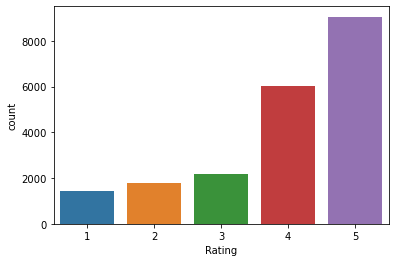

In [250]:
sns.countplot(x=data.Rating,data=data)

In [251]:
data['Rating'].value_counts()

5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

In [252]:
len(data)

20491

In [253]:
sentiment=[]
for i in range(len(data)):
    if  data['Rating'][i]>3:
        sentiment.append('positive')
    else:
        sentiment.append('negative')

In [254]:
Rating1=[]
for i in range(len(data)):
    if  data['Rating'][i]>3:
        Rating1.append(1)
    else:
        Rating1.append(0)

In [255]:
Rating1=pd.DataFrame(Rating1,columns=['Rating1'])

In [256]:
sentiment=pd.DataFrame(sentiment,columns=['sentiment'])

In [257]:
data=pd.concat([data,Rating1],axis=1)

In [258]:
data=pd.concat([data,sentiment],axis=1)

In [259]:
data['sentiment'].value_counts()

positive    15093
negative     5398
Name: sentiment, dtype: int64

<AxesSubplot:xlabel='sentiment', ylabel='count'>

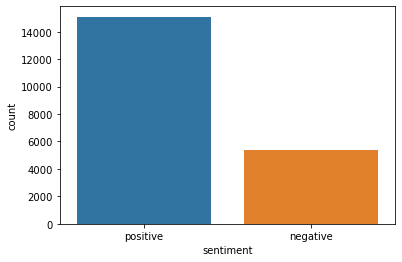

In [260]:
sns.countplot(x=data.sentiment,data=data)

<AxesSubplot:ylabel='sentiment'>

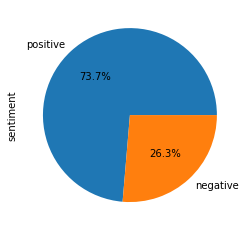

In [261]:
data['sentiment'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [262]:
length=[]
for i in range(len(data)):
    length.append(len(data['Review'][i]))
    

In [263]:
length=pd.DataFrame(length,columns=['length'])

In [264]:
data=pd.concat([data,length],axis=1)

In [265]:
data

,Review,Rating,Rating1,sentiment,length
0,nice hotel expensive parking got good deal sta...,4,1,positive,593
1,ok nothing special charge diamond member hilto...,2,0,negative,1689
2,nice rooms not 4* experience hotel monaco seat...,3,0,negative,1427
3,"unique, great stay, wonderful time hotel monac...",5,1,positive,600
4,"great stay great stay, went seahawk game aweso...",5,1,positive,1281
...,...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,1,positive,733
20487,great location price view hotel great quick pl...,4,1,positive,306
20488,"ok just looks nice modern outside, desk staff ...",2,0,negative,443
20489,hotel theft ruined vacation hotel opened sept ...,1,0,negative,5557


In [266]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [267]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [268]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

analyzer = SentimentIntensityAnalyzer()

In [269]:
data['Compound'] = [analyzer.polarity_scores(txt)['compound'] for txt in data['Review']]
data['Positive'] = [analyzer.polarity_scores(txt)['pos'] for txt in data['Review']]
data['Neutral'] = [analyzer.polarity_scores(txt)['neu'] for txt in data['Review']]
data['Negative'] = [analyzer.polarity_scores(txt)['neg'] for txt in data['Review']]   
data

,Review,Rating,Rating1,sentiment,length,Compound,Positive,Neutral,Negative
0,nice hotel expensive parking got good deal sta...,4,1,positive,593,0.9626,0.261,0.646,0.093
1,ok nothing special charge diamond member hilto...,2,0,negative,1689,0.9870,0.197,0.711,0.092
2,nice rooms not 4* experience hotel monaco seat...,3,0,negative,1427,0.9842,0.200,0.715,0.084
3,"unique, great stay, wonderful time hotel monac...",5,1,positive,600,0.9920,0.388,0.557,0.055
4,"great stay great stay, went seahawk game aweso...",5,1,positive,1281,0.9870,0.238,0.644,0.118
...,...,...,...,...,...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,1,positive,733,0.9699,0.242,0.671,0.087
20487,great location price view hotel great quick pl...,4,1,positive,306,0.9753,0.430,0.570,0.000
20488,"ok just looks nice modern outside, desk staff ...",2,0,negative,443,0.2629,0.145,0.724,0.131
20489,hotel theft ruined vacation hotel opened sept ...,1,0,negative,5557,0.9696,0.168,0.677,0.155


In [270]:
#Polarity and subjectivity#

import textblob
from textblob import TextBlob

data["Polarity"]=data["Review"].apply(lambda x:TextBlob(x).sentiment.polarity)
data["Subjectivity"]=data["Review"].apply(lambda x:TextBlob(x).sentiment.subjectivity)


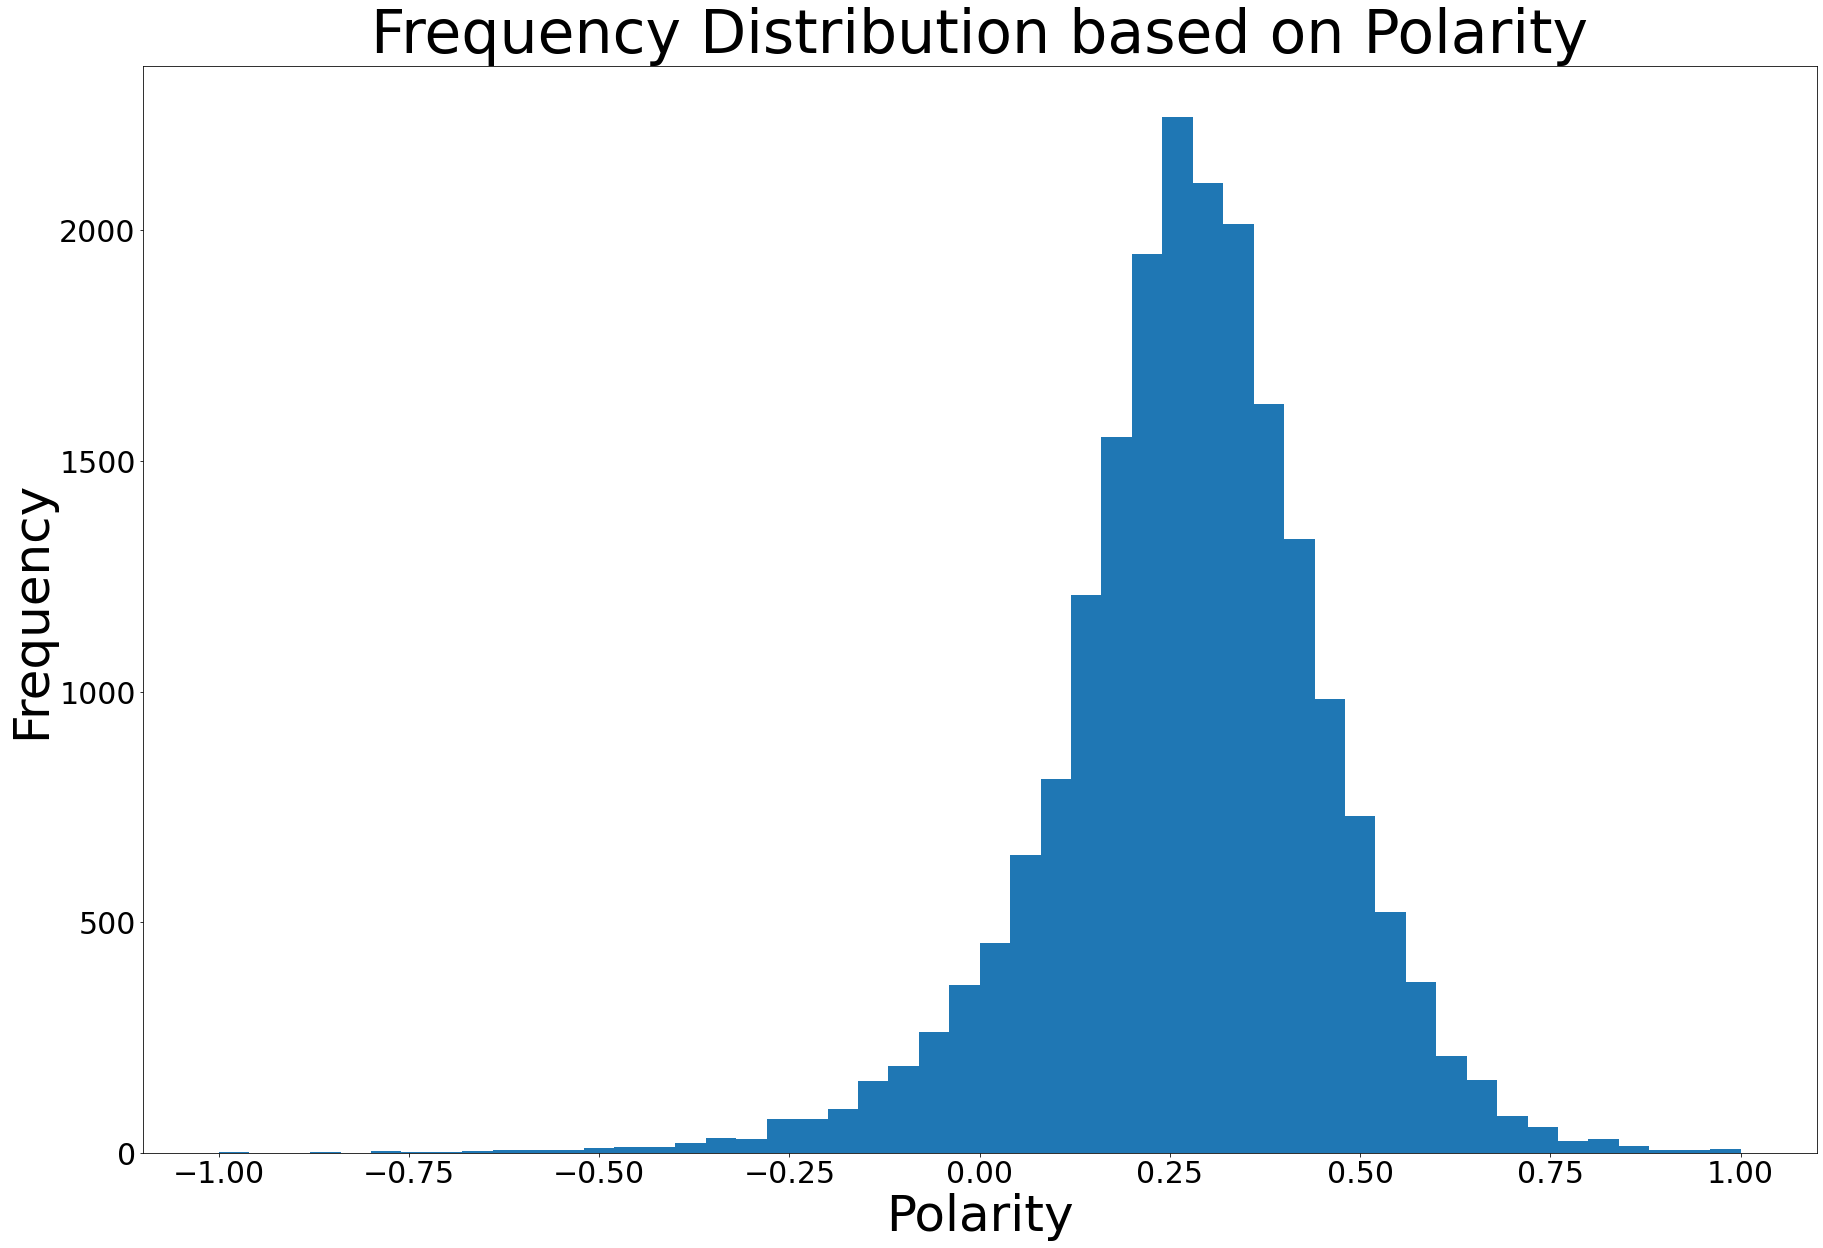

In [271]:
#Frequency Distribution based on Polarity

plt.figure(figsize=(30,20),edgecolor="black")
plt.margins(0.05)
plt.xlabel("Polarity",fontsize=50)
plt.xticks(fontsize=30)
plt.ylabel("Frequency",fontsize=50)
plt.yticks(fontsize=30)
plt.hist(data["Polarity"],bins=50)
plt.title("Frequency Distribution based on Polarity",fontsize=60)
plt.show()

In [272]:
Y=data['Rating1']

In [273]:
X=data['Review']

In [274]:
X[0]

'nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,  '

# X=[word for word in X if word]

In [275]:
X[0]

'nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,  '

In [276]:
X=[word.strip() for word in X]

In [277]:
X[0]

'nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,'

In [278]:
X=[word for word in X if word] 

In [279]:
X[0]

'nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,'

In [280]:
X=[word.lower() for word in X]

In [281]:
X[0]

'nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,'

In [282]:
import re
X=[re.sub('\s+',' ',word) for word in X]

In [283]:
X[0]

'nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,'

In [284]:
X=[re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", word)for word in X]

In [285]:
X[0]

'nice hotel expensive parking got good deal stay hotel anniversary arrived late evening took advice previous reviews did valet parking check quick easy little disappointed nonexistent view room room clean nice size bed comfortable woke stiff neck high pillows not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway maybe just noisy neighbors aveda bath products nice did not goldfish stay nice touch taken advantage staying longer location great walking distance shopping overall nice experience having pay 40 parking night'

In [286]:
X=[re.sub('[0-9' ']+','',word) for word in X]

In [287]:
X[0]

'nice hotel expensive parking got good deal stay hotel anniversary arrived late evening took advice previous reviews did valet parking check quick easy little disappointed nonexistent view room room clean nice size bed comfortable woke stiff neck high pillows not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway maybe just noisy neighbors aveda bath products nice did not goldfish stay nice touch taken advantage staying longer location great walking distance shopping overall nice experience having pay  parking night'

In [288]:
X=[re.sub('[^A-Za-z' ']+',' ',word) for word in X]

In [289]:
X[0]

'nice hotel expensive parking got good deal stay hotel anniversary arrived late evening took advice previous reviews did valet parking check quick easy little disappointed nonexistent view room room clean nice size bed comfortable woke stiff neck high pillows not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway maybe just noisy neighbors aveda bath products nice did not goldfish stay nice touch taken advantage staying longer location great walking distance shopping overall nice experience having pay parking night'

In [290]:
import string
for i in range(len(X)):
    X[i] = X[i].translate(str.maketrans('', '', string.punctuation))

In [291]:
X[0]

'nice hotel expensive parking got good deal stay hotel anniversary arrived late evening took advice previous reviews did valet parking check quick easy little disappointed nonexistent view room room clean nice size bed comfortable woke stiff neck high pillows not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway maybe just noisy neighbors aveda bath products nice did not goldfish stay nice touch taken advantage staying longer location great walking distance shopping overall nice experience having pay parking night'

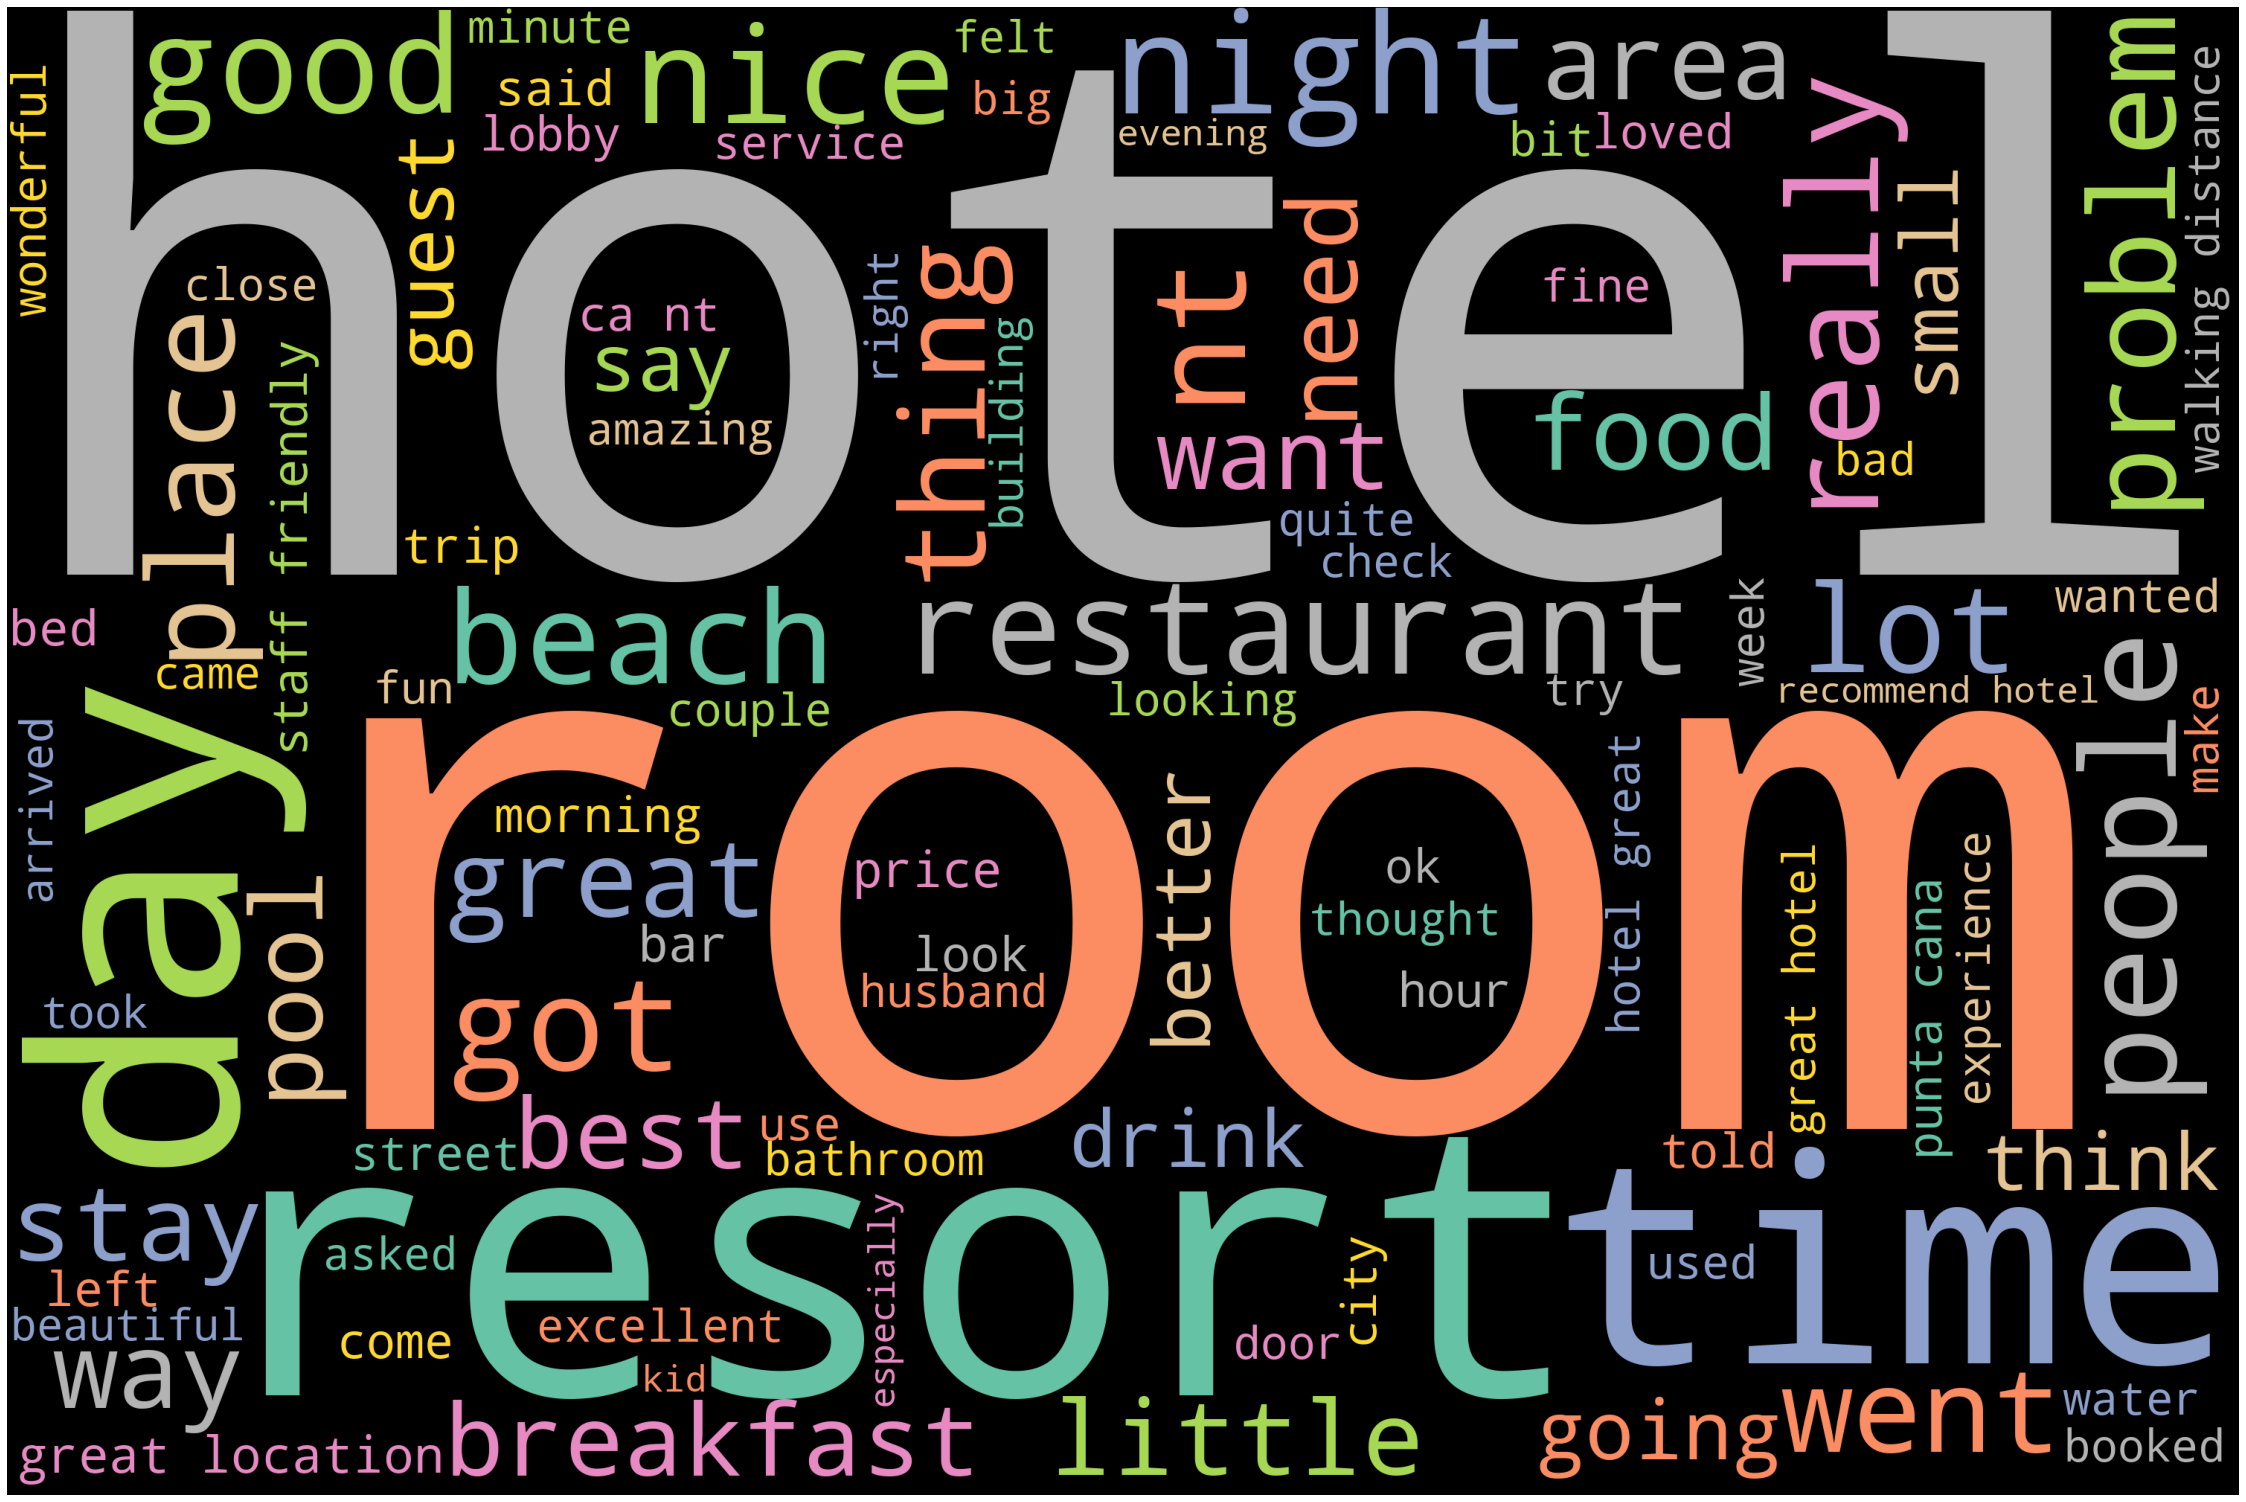

In [292]:
text=' '.join(X)
# Import packages
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud) 
    plt.axis("off");
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2').generate(text)
# Plot
plot_cloud(wordcloud)

In [293]:
from nltk.tokenize import word_tokenize

In [294]:
for i in range(len(X)):
    X[i]=word_tokenize(X[i])

In [295]:
X[0]

['nice',
 'hotel',
 'expensive',
 'parking',
 'got',
 'good',
 'deal',
 'stay',
 'hotel',
 'anniversary',
 'arrived',
 'late',
 'evening',
 'took',
 'advice',
 'previous',
 'reviews',
 'did',
 'valet',
 'parking',
 'check',
 'quick',
 'easy',
 'little',
 'disappointed',
 'nonexistent',
 'view',
 'room',
 'room',
 'clean',
 'nice',
 'size',
 'bed',
 'comfortable',
 'woke',
 'stiff',
 'neck',
 'high',
 'pillows',
 'not',
 'soundproof',
 'like',
 'heard',
 'music',
 'room',
 'night',
 'morning',
 'loud',
 'bangs',
 'doors',
 'opening',
 'closing',
 'hear',
 'people',
 'talking',
 'hallway',
 'maybe',
 'just',
 'noisy',
 'neighbors',
 'aveda',
 'bath',
 'products',
 'nice',
 'did',
 'not',
 'goldfish',
 'stay',
 'nice',
 'touch',
 'taken',
 'advantage',
 'staying',
 'longer',
 'location',
 'great',
 'walking',
 'distance',
 'shopping',
 'overall',
 'nice',
 'experience',
 'having',
 'pay',
 'parking',
 'night']

In [296]:
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

my_stop_words = stopwords.words('english')
my_stop_words.append('the')
my_stop_words.append('hotel')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Suneetha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Suneetha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [297]:
for i in range(len(X)):
    X[i]= [word for word in X[i] if not word in my_stop_words]

In [298]:
for i in range(len(X)):
    X[i]= [word.lower() for word in X[i]]

In [299]:
X[0]

['nice',
 'expensive',
 'parking',
 'got',
 'good',
 'deal',
 'stay',
 'anniversary',
 'arrived',
 'late',
 'evening',
 'took',
 'advice',
 'previous',
 'reviews',
 'valet',
 'parking',
 'check',
 'quick',
 'easy',
 'little',
 'disappointed',
 'nonexistent',
 'view',
 'room',
 'room',
 'clean',
 'nice',
 'size',
 'bed',
 'comfortable',
 'woke',
 'stiff',
 'neck',
 'high',
 'pillows',
 'soundproof',
 'like',
 'heard',
 'music',
 'room',
 'night',
 'morning',
 'loud',
 'bangs',
 'doors',
 'opening',
 'closing',
 'hear',
 'people',
 'talking',
 'hallway',
 'maybe',
 'noisy',
 'neighbors',
 'aveda',
 'bath',
 'products',
 'nice',
 'goldfish',
 'stay',
 'nice',
 'touch',
 'taken',
 'advantage',
 'staying',
 'longer',
 'location',
 'great',
 'walking',
 'distance',
 'shopping',
 'overall',
 'nice',
 'experience',
 'pay',
 'parking',
 'night']

In [300]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [301]:
for i in range(len(X)):
    X[i]= [ps.stem(word) for word in X[i]]

In [302]:
len(X)

20491

In [303]:
for i in range(len(X)):
    X[i]=' '.join([word for word in X[i]])

In [304]:
X[20000]

'best rememb book internet go pictur review read site glad love modern tast excel equipt clean locat nt perfect site barcelona gaudi build museum shop bar resaur catalyuna squar litter corner bu metro servic bring ride away chang bu metrolin extrem easi need holiday staff help request need emerg dental treatment receptionist boss got dentist straight away impress servic excel custom carei recommend highli school door effect littl issu wonder'

In [305]:
from sklearn.feature_extraction.text import TfidfVectorizer
vector=TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 500)
matrix=vector.fit_transform(X)


In [306]:
vector

TfidfVectorizer(max_features=500, ngram_range=(1, 3))

In [307]:
print("Sparse Matrix n",matrix.shape,"n",matrix.toarray())

Sparse Matrix n (20491, 500) n [[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.06332609 0.03067862 ... 0.         0.         0.08226522]
 [0.         0.         0.         ... 0.         0.32600002 0.        ]]


In [308]:
X=matrix.toarray()

In [309]:
len(X)

20491

In [310]:
X[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.09875357, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.14095094,
       0.        , 0.        , 0.        , 0.08350514, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.10060

In [311]:
features=vector.get_feature_names_out()
features

array(['abl', 'absolut', 'access', 'accomod', 'activ', 'actual', 'air',
       'airport', 'amaz', 'amen', 'american', 'amsterdam', 'area',
       'arriv', 'ask', 'ate', 'attent', 'attract', 'avail', 'averag',
       'away', 'awesom', 'bad', 'bag', 'balconi', 'bar', 'barcelona',
       'base', 'basic', 'bath', 'bathroom', 'beach', 'beauti', 'bed',
       'bedroom', 'beer', 'believ', 'best', 'better', 'big', 'bit',
       'block', 'book', 'bother', 'bottl', 'breakfast', 'bring',
       'brought', 'bu', 'buffet', 'build', 'busi', 'buy', 'ca', 'ca nt',
       'cab', 'cafe', 'call', 'came', 'cana', 'car', 'card', 'care',
       'cart', 'casino', 'center', 'centr', 'central', 'certainli',
       'chair', 'chang', 'charg', 'charm', 'cheap', 'check', 'checkin',
       'children', 'choic', 'choos', 'chose', 'citi', 'clean', 'close',
       'club', 'coffe', 'cold', 'come', 'comfort', 'comment', 'compar',
       'complain', 'complaint', 'complet', 'complimentari', 'concierg',
       'condit', 'co

In [312]:
features1=' '.join(features)

In [313]:
# Getting top ranking features
sums = matrix.sum(axis = 0)
data1 = []
for col, term in enumerate(features):
    data1.append( (term, sums[0,col] ))
ranking = pd.DataFrame(data1, columns = ['term','rank'])
words = (ranking.sort_values('rank', ascending = False))
print(words.head(7))

      term         rank
365   room  1898.421716
419   stay  1469.302397
182  great  1307.824473
292     nt  1062.218982
179   good  1046.342837
245  locat  1031.925092
412  staff   996.393543


In [314]:
word1=words.head(10)

<AxesSubplot:xlabel='term', ylabel='rank'>

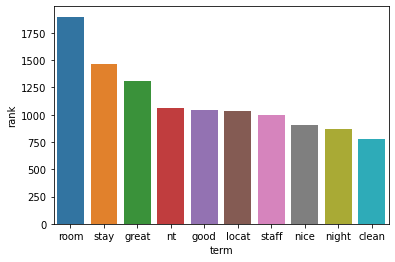

In [315]:
sns.barplot(x=word1['term'],y=word1['rank'],data=word1)

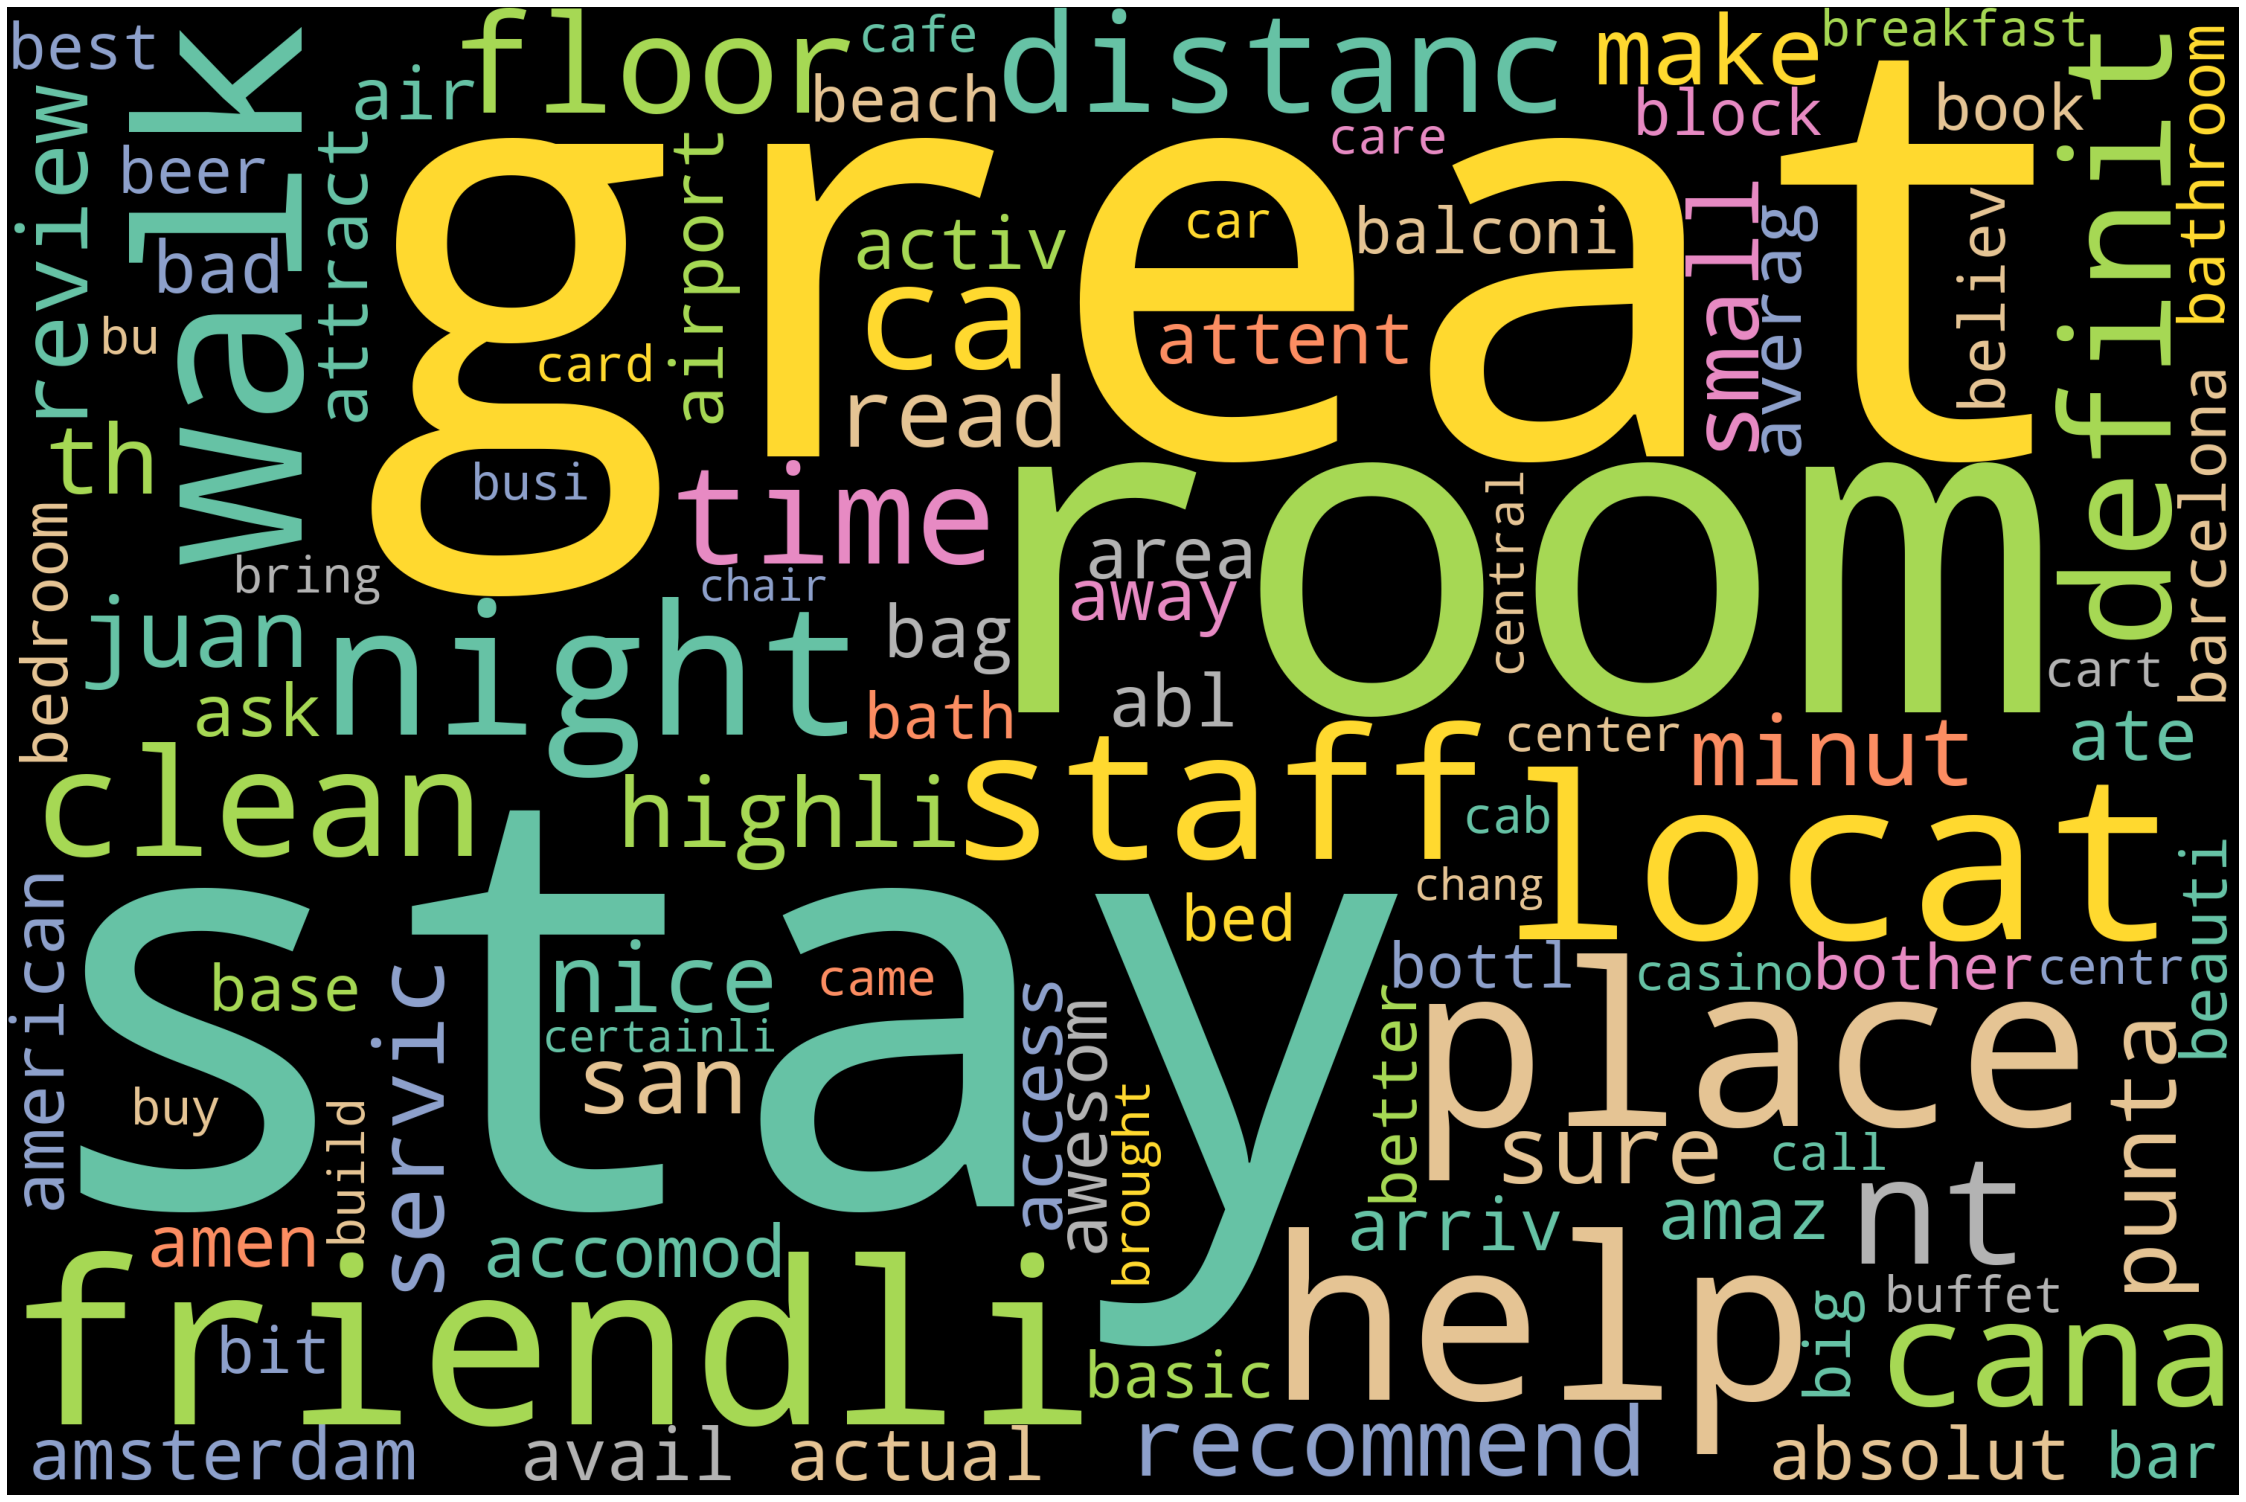

In [316]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud) 
    plt.axis("off");
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2').generate(features1)
# Plot
plot_cloud(wordcloud)

In [317]:
vector1=TfidfVectorizer(analyzer='word', ngram_range=(2,3), max_features = 500)


In [318]:
features_new=vector.get_feature_names_out()
features_new

array(['abl', 'absolut', 'access', 'accomod', 'activ', 'actual', 'air',
       'airport', 'amaz', 'amen', 'american', 'amsterdam', 'area',
       'arriv', 'ask', 'ate', 'attent', 'attract', 'avail', 'averag',
       'away', 'awesom', 'bad', 'bag', 'balconi', 'bar', 'barcelona',
       'base', 'basic', 'bath', 'bathroom', 'beach', 'beauti', 'bed',
       'bedroom', 'beer', 'believ', 'best', 'better', 'big', 'bit',
       'block', 'book', 'bother', 'bottl', 'breakfast', 'bring',
       'brought', 'bu', 'buffet', 'build', 'busi', 'buy', 'ca', 'ca nt',
       'cab', 'cafe', 'call', 'came', 'cana', 'car', 'card', 'care',
       'cart', 'casino', 'center', 'centr', 'central', 'certainli',
       'chair', 'chang', 'charg', 'charm', 'cheap', 'check', 'checkin',
       'children', 'choic', 'choos', 'chose', 'citi', 'clean', 'close',
       'club', 'coffe', 'cold', 'come', 'comfort', 'comment', 'compar',
       'complain', 'complaint', 'complet', 'complimentari', 'concierg',
       'condit', 'co

In [319]:
features_new1=' '.join(features_new)

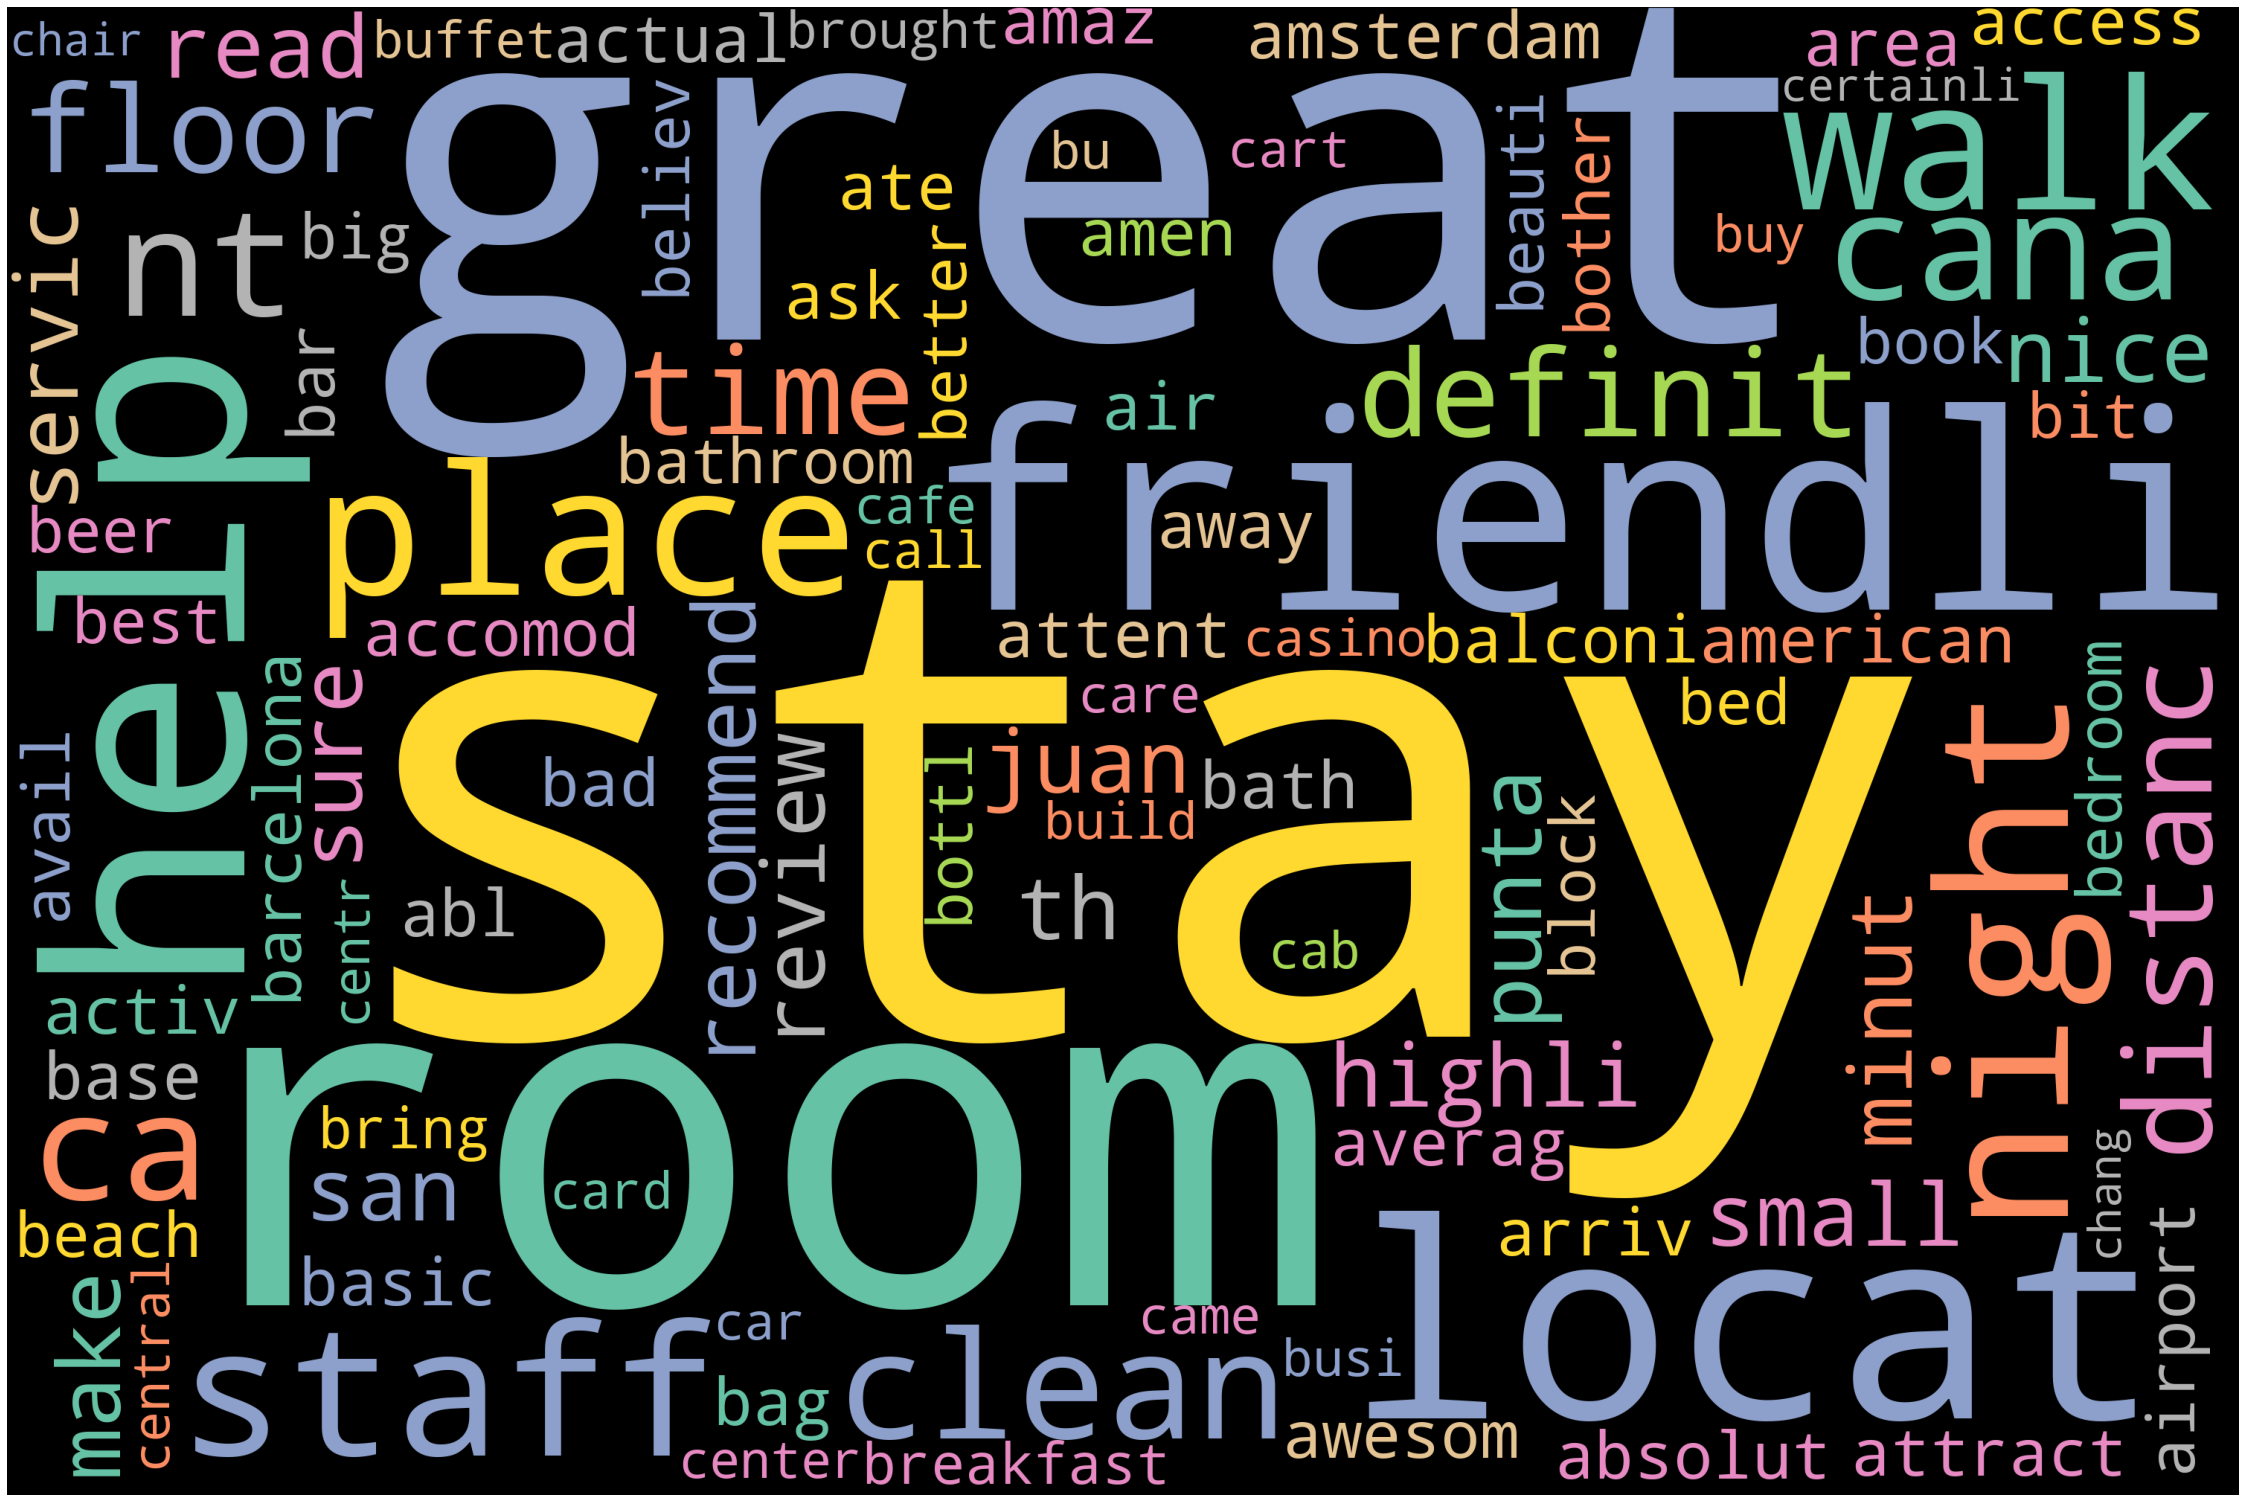

In [320]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud) 
    plt.axis("off");
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2').generate(features_new1)
# Plot
plot_cloud(wordcloud)

In [321]:
word1=words.head(10)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'room'),
  Text(1, 0, 'stay'),
  Text(2, 0, 'great'),
  Text(3, 0, 'nt'),
  Text(4, 0, 'good'),
  Text(5, 0, 'locat'),
  Text(6, 0, 'staff'),
  Text(7, 0, 'nice'),
  Text(8, 0, 'night'),
  Text(9, 0, 'clean')])

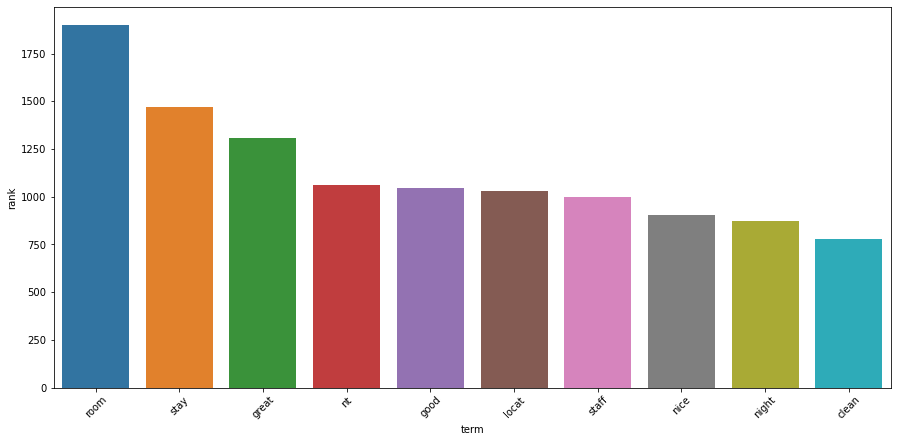

In [322]:
plt.figure(figsize=(15,7))
sns.barplot(x=word1['term'],y=word1['rank'],data=word1)
plt.xticks(rotation=45)

In [323]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [324]:
Y

0        1
1        0
2        0
3        1
4        1
        ..
20486    1
20487    1
20488    0
20489    0
20490    0
Name: Rating1, Length: 20491, dtype: int64

In [325]:
x_train, x_test,y_train,y_test = train_test_split(X,Y, test_size=0.3,random_state=4)

In [326]:

# import tensorflow as tf
# tf.keras.layers.Embedding
# import numpy as np
# np.random.seed(1337)  # for reproducibility
# import tensorflow as tf
# from tensorflow.keras.preprocessing import sequence
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional, SimpleRNN, GRU
# from tensorflow.keras.layers import Flatten
# from tensorflow.keras.datasets import imdb


In [327]:
from sklearn.ensemble import RandomForestClassifier

In [328]:
from sklearn.model_selection import GridSearchCV

In [329]:
model1 = RandomForestClassifier(criterion='gini',max_features='auto',
                                n_estimators=100,min_samples_split =10,min_samples_leaf = 1,max_depth=10)

In [330]:
model1.fit(x_train,y_train)

C:\Users\Suneetha\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=10, max_features='auto', min_samples_split=10)

In [331]:
train_pred=model1.predict(x_train)

In [332]:
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           0       0.99      0.31      0.47      3799
           1       0.80      1.00      0.89     10544

    accuracy                           0.82     14343
   macro avg       0.89      0.65      0.68     14343
weighted avg       0.85      0.82      0.78     14343



In [333]:
test_pred=model1.predict(x_test)

In [334]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.94      0.20      0.33      1599
           1       0.78      1.00      0.87      4549

    accuracy                           0.79      6148
   macro avg       0.86      0.60      0.60      6148
weighted avg       0.82      0.79      0.73      6148



In [339]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [343]:
pip list or conda list

Package                            Version
---------------------------------- --------------------
alabaster                          0.7.12
altair                             4.2.0
anaconda-client                    1.9.0
anaconda-navigator                 2.1.4
anaconda-project                   0.10.1
anyio                              2.2.0
appdirs                            1.4.4
argh                               0.26.2
argon2-cffi                        20.1.0
arrow                              0.13.1
asn1crypto                         1.4.0
astroid                            2.6.6
astropy                            4.3.1
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              21.2.0
autopep8                           1.5.7
Babel                              2.9.1
backcall                           0.2.0
backports.functools-lru-cache      1.6.4
backports.shutil-get-terminal-size 1.0.0
backports.tempfile                 

In [348]:
pip install conda

Note: you may need to restart the kernel to use updated packages.


In [351]:
pip install tensorflow

  Using cached tensorflow-2.9.1-cp39-cp39-win_amd64.whl (444.0 MB)
  Using cached libclang-14.0.6-py2.py3-none-win_amd64.whl (14.2 MB)
  Using cached tensorboard-2.9.1-py3-none-any.whl (5.8 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached keras-2.9.0-py2.py3-none-any.whl (1.6 MB)
  Using cached absl_py-1.2.0-py3-none-any.whl (123 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
Note: you may need to restart the kernel to use updated packages.  Using cached tensorflow_estimator-2.9.0-py2.py3-none-any.whl (438 kB)
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached tensorflow_io_gcs_filesystem-0.26.0-cp39-cp39-win_amd64.whl (1.5 MB)
  Using cached grpcio-1.47.0-cp39-cp39-win_amd64.whl (3.6 MB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  U

In [352]:
import cv2

import os

import numpy as np

import pickle

import tensorflow as tf

from tensorflow.keras import layers

from tensorflow.keras import models,utils

import pandas as pd

from tensorflow.keras.models import load_model

from tensorflow.keras.preprocessing.image import load_img,img_to_array

from tensorflow.python.keras import utils

In [353]:
current_path = os.getcwd()

In [354]:
hotel_review_path = os.path.join(current_path, 'C:\Users\Suneetha\python files\PROJECT-2')

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 9-10: truncated \UXXXXXXXX escape (Temp/ipykernel_9036/1786740997.py, line 1)

In [ ]:
predictor_model = load_model(r'streamlit.py')

In [ ]:
def predictor(img_path): # here image is file name 

    img = load_img(img_path, target_size=(331,331))

    img = img_to_array(img)

    img = np.expand_dims(img,axis = 0)

    features = feature_extractor.predict(img)

    prediction = predictor_model.predict(features)*100

    prediction = pd.DataFrame(np.round(prediction,1),columns = dog_breeds).transpose()

    prediction.columns = ['values']
    
    prediction  = prediction.nlargest(5, 'values')

    prediction = prediction.reset_index()

    prediction.columns = ['name', 'values']

    return(prediction)